In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle 
import sys
import gym
import pandas as pd

sys.path.append('../modules/')
from Utils import running_mean as rm

In [2]:
data_dir = '../Data/results/'
df = pd.read_csv('../Data/mf_training.csv')
df

,timestamp,run_id,env_type,expt_type,ntrials,nevents,Mftemp,Ectemp,Num_inputs,PlaceCell_fieldsize,pass
0,Sat Mar 20 11:44:31 2021,c4632834-1950-4487-8a15-14cf6dd4a330,gym_grid:gridworld-v1,onehot_train,5000,250,1,None,400.0,NaN,pass
1,Sat Mar 20 11:52:56 2021,73159540-face-484e-8372-49933a5b40bd,gym_grid:gridworld-v1,onehot_train,5000,250,1,None,400.0,NaN,pass
2,Sat Mar 20 11:57:16 2021,3712bc3e-75de-4e35-af75-8eed11f7f387,gym_grid:gridworld-v1,onehot_train,5000,250,1,None,400.0,NaN,pass
3,Sat Mar 20 12:16:25 2021,bc75125e-446b-43a6-89dc-a35c3003e6e6,gym_grid:gridworld-v1,onehot_train,5000,250,1,None,400.0,NaN,pass
4,Sat Mar 20 12:23:34 2021,a8d11e6f-63cc-417d-8d4a-a6429c2f52da,gym_grid:gridworld-v1,onehot_train,5000,250,1,None,400.0,NaN,pass
...,...,...,...,...,...,...,...,...,...,...,...
144,Fri Mar 26 13:37:00 2021,48499f8f-9f4b-4596-a392-80c63601eed6,gym_grid:gridworld-v6,sr_train_with_rec,5000,250,1,None,NaN,NaN,NaN
145,Fri Mar 26 13:39:35 2021,865b4443-26fb-40aa-8bd9-529c0ee21b04,gym_grid:gridworld-v6,sr_train_with_rec,5000,250,1,None,NaN,NaN,NaN
146,Fri Mar 26 13:43:05 2021,b23f948f-5bb4-4f40-847c-46d56f9fe540,gym_grid:gridworld-v6,sr_train_with_rec,5000,250,1,None,NaN,NaN,NaN
147,Fri Mar 26 13:46:10 2021,fafbe2b2-2179-4037-aee6-71ddae034044,gym_grid:gridworld-v6,sr_train_with_rec,5000,250,1,None,NaN,NaN,NaN


In [3]:
master_dict = {}
envs = df.env_type.unique()
pf_s = df.PlaceCell_fieldsize.unique()
exps = df.expt_type.unique()
for env in envs:
    master_dict[env] = {}
    for ext in exps:
        if ext != 'onehot_train':
            for _, pf_size in enumerate(pf_s):
                if _ == 0: 
                    pass
                else:
                    id_list = list(df.loc[(df['env_type']==env) 
                                          & (df['PlaceCell_fieldsize']==pf_size)]['run_id'])
                    k = pf_size

                    master_dict[env][k]=id_list
        else:
            id_list = list(df.loc[(df['env_type']==env) 
                                      & (df['expt_type']=='onehot_train')]['run_id'])
            k = 'OH'
            
            master_dict[env][k]=id_list

In [4]:
for key, val in master_dict.items():
    print(key)
    for k,v in master_dict[key].items():
        print(k, len(v))

gym_grid:gridworld-v1
OH 5
0.1 15
0.2 10
0.3 5
gym_grid:gridworld-v2
OH 5
0.1 11
0.2 10
0.3 5
gym_grid:gridworld-v3
OH 5
0.1 10
0.2 10
0.3 5
gym_grid:gridworld-v4
OH 5
0.1 10
0.2 10
0.3 5
gym_grid:gridworld-v6
OH 2
0.1 0
0.2 0
0.3 0


In [2]:
def get_avg_std(list_of_ids, cutoff=1000):
    results = []
    for id_num in list_of_ids: 
        with open(data_dir+ f'{id_num}_data.p', 'rb') as f:
            dats = pickle.load(f)
            reward_info = dats['total_reward']
            results.append(reward_info)
            
    pp = np.vstack(results)
    
    smoothing = 50
    avg_ = rm(np.mean(pp,axis=0),smoothing)[0:cutoff]
    std_ = rm(np.std(pp, axis=0), smoothing)[0:cutoff]
    
    return avg_, std_

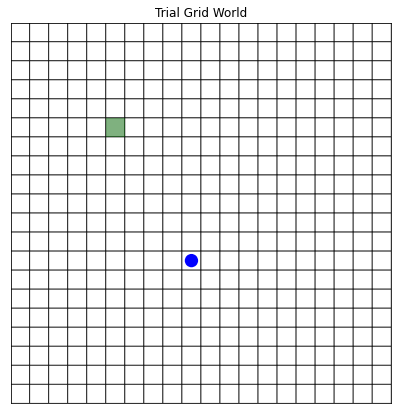

dict_keys(['OH', 0.1, 0.2, 0.3])


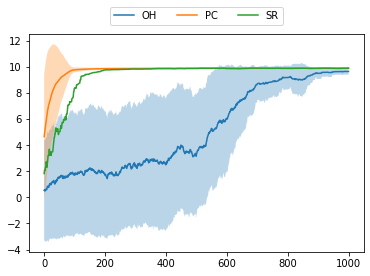

In [20]:
environment = 'gym_grid:gridworld-v1'
env = gym.make(environment)
plt.show()
plt.close()
plt.figure()
print(master_dict[environment].keys())
for key in ['OH', 0.1]: #master_dict[environment].items():
    v_list = master_dict[environment][key]
    avg_, std_ = get_avg_std(v_list)
    if key == 0.1:
        label = "PC"
    else:
        label= key
    plt.plot(avg_, label=f'{label}')
    plt.fill_between(np.arange(len(avg_)),avg_-std_, avg_+std_, alpha=0.3)
sr_id = 'da6b28db-f7e3-43e5-8749-e801aae732a3'
avg_,std_ = get_avg_std([sr_id])
plt.plot(avg_, label='SR')
plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.15), ncol=4)
plt.show()

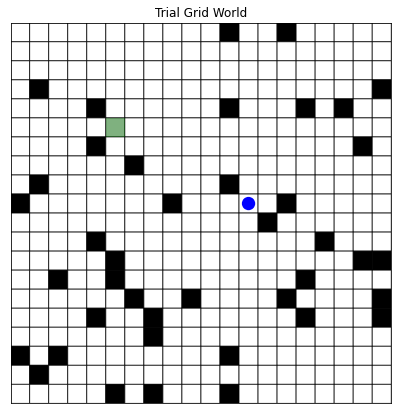

dict_keys(['OH', 0.1, 0.2, 0.3])


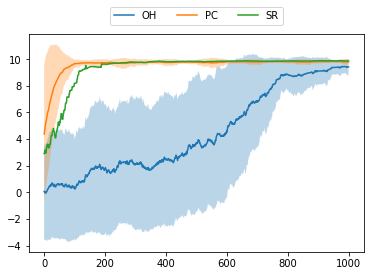

In [21]:
environment = 'gym_grid:gridworld-v2'
env = gym.make(environment)
plt.show()
plt.close()
plt.figure()
print(master_dict[environment].keys())
for key in ['OH', 0.1]: #master_dict[environment].items():
    v_list = master_dict[environment][key]
    avg_, std_ = get_avg_std(v_list)
    if key == 0.1:
        label = "PC"
    else:
        label= key
    plt.plot(avg_, label=f'{label}')
    plt.fill_between(np.arange(len(avg_)),avg_-std_, avg_+std_, alpha=0.3)
sr_id = 'f4fb39b7-7be8-4824-8d9d-51041ed6907e'
avg_,std_ = get_avg_std([sr_id])
plt.plot(avg_, label='SR')
plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.15), ncol=4)
plt.show()

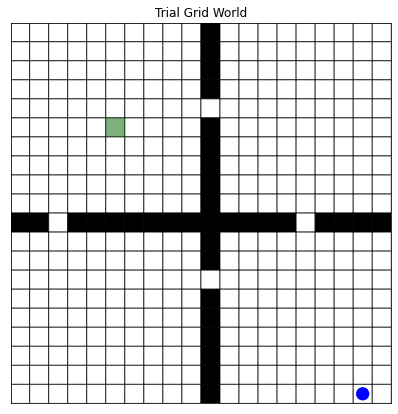

dict_keys(['OH', 0.1, 0.2, 0.3])


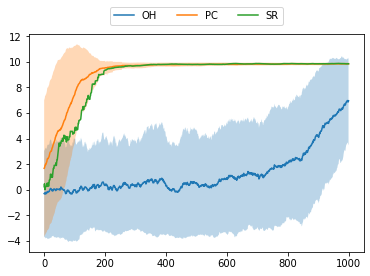

In [23]:
environment = 'gym_grid:gridworld-v3'
env = gym.make(environment)
plt.show()
plt.close()
plt.figure()
print(master_dict[environment].keys())
for key in ['OH', 0.1]: #master_dict[environment].items():
    v_list = master_dict[environment][key]
    avg_, std_ = get_avg_std(v_list)
    if key == 0.1:
        label = "PC"
    else:
        label= key
    plt.plot(avg_, label=f'{label}')
    plt.fill_between(np.arange(len(avg_)),avg_-std_, avg_+std_, alpha=0.3)
sr_id = '34797757-7b24-4ee9-b822-bedaaa934a98'
avg_,std_ = get_avg_std([sr_id])
plt.plot(avg_, label='SR')
plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.15), ncol=4)
plt.show()

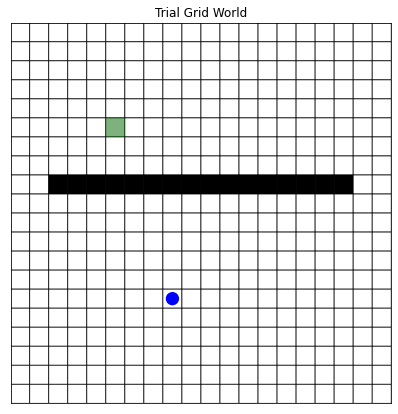

dict_keys(['OH', 0.1, 0.2, 0.3])


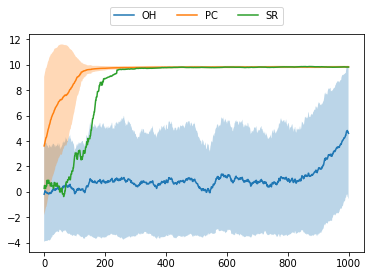

In [24]:
environment = 'gym_grid:gridworld-v4'
env = gym.make(environment)
plt.show()
plt.close()
plt.figure()
print(master_dict[environment].keys())
for key in ['OH', 0.1]: #master_dict[environment].items():
    v_list = master_dict[environment][key]
    avg_, std_ = get_avg_std(v_list)
    if key == 0.1:
        label = "PC"
    else:
        label= key
    plt.plot(avg_, label=f'{label}')
    plt.fill_between(np.arange(len(avg_)),avg_-std_, avg_+std_, alpha=0.3)
sr_id = '58be55cf-9b70-4df5-9cc8-ce983388a435'
avg_,std_ = get_avg_std([sr_id])
plt.plot(avg_, label='SR')
plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.15), ncol=4)
plt.show()

In [52]:
## testing data: 
data_dir = '../Data/results/'
df = pd.read_csv('../Data/ec_testing.csv')
df

,timestamp,run_id,env_type,expt_type,ntrials,nevents,Mftemp,Ectemp,load_agent_from_id
0,Wed Mar 24 13:51:03 2021,402faf8b-f545-4e38-b383-00bfc3dc818b,gym_grid:gridworld-v1,onehot_testing,1000,250,1,0.05,c4632834-1950-4487-8a15-14cf6dd4a330
1,Wed Mar 24 14:08:56 2021,d146055b-be78-44f9-8f3c-ae9fd9d37817,gym_grid:gridworld-v1,onehot_testing,1000,250,1,0.05,c4632834-1950-4487-8a15-14cf6dd4a330
2,Wed Mar 24 14:17:24 2021,2548d183-b6a1-4faa-8c76-bdaae3f07e46,gym_grid:gridworld-v2,onehot_testing,1000,250,1,0.05,dd8a3d7c-53ae-4549-9cad-071eed50802c
3,Wed Mar 24 14:27:33 2021,9463f7f8-4f54-4569-a0aa-bfb6c132f020,gym_grid:gridworld-v3,onehot_testing,1000,250,1,0.05,de1c435d-f9a3-421d-b2e2-8c03b3075fb7
4,Wed Mar 24 14:35:27 2021,93352798-dfce-4caf-94e3-7299562abd8e,gym_grid:gridworld-v4,onehot_testing,1000,250,1,0.05,6c153a93-773a-4880-89bd-493d38226f9d
5,Wed Mar 24 14:39:03 2021,8ae0011c-7749-40e8-afc9-febac32477cc,gym_grid:gridworld-v1,place_cell_testing,1000,250,1,0.05,a9055c87-01cc-49db-9dfc-5a7a3ed74fb7
6,Wed Mar 24 14:57:57 2021,efe06612-739d-49e8-8403-69c059506bb9,gym_grid:gridworld-v2,place_cell_testing,1000,250,1,0.05,b7b591f3-ff22-4d10-9225-2572ef8a616d


In [53]:
master_dict = {}
envs = df.env_type.unique()
#pf_s = df.PlaceCell_fieldsize.unique()
exps = df.expt_type.unique()
for ext in exps:
    if ext[0:6]=='onehot':
        print('hello')
    elif ext[0:10]=='place_cell':
        print('good')
    elif ext[0:8] == 'sr_train':
        print('df')

hello
good


In [54]:
for env in envs:
    master_dict[env] = {}
    for ext in exps:
        if ext[0:6] == 'onehot':
            id_list = list(df.loc[(df['env_type']==env) 
                                      & (df['expt_type']=='onehot_testing')]['run_id'])
            k = 'OH'            
        elif ext[0:10]=='place_cell':
            id_list = list(df.loc[(df['env_type']==env) 
                                  & (df['expt_type']=='place_cell_testing')]['run_id'])
            k ='PC'
            
        elif ext[0:8] == 'sr_train':
            id_list = list(df.loc[(df['env_type']==env) 
                                  & (df['expt_type']=='sr_train_wi_testing')]['run_id'])
            k='SR'
        master_dict[env][k]=id_list

In [55]:
print(master_dict)

{'gym_grid:gridworld-v1': {'OH': ['402faf8b-f545-4e38-b383-00bfc3dc818b', 'd146055b-be78-44f9-8f3c-ae9fd9d37817'], 'PC': ['8ae0011c-7749-40e8-afc9-febac32477cc']}, 'gym_grid:gridworld-v2': {'OH': ['2548d183-b6a1-4faa-8c76-bdaae3f07e46'], 'PC': ['efe06612-739d-49e8-8403-69c059506bb9']}, 'gym_grid:gridworld-v3': {'OH': ['9463f7f8-4f54-4569-a0aa-bfb6c132f020'], 'PC': []}, 'gym_grid:gridworld-v4': {'OH': ['93352798-dfce-4caf-94e3-7299562abd8e'], 'PC': []}}


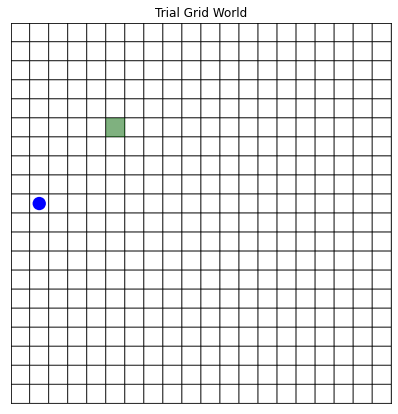

OH 2
PC 1


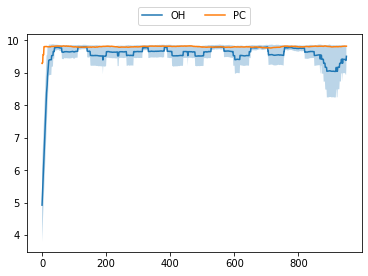

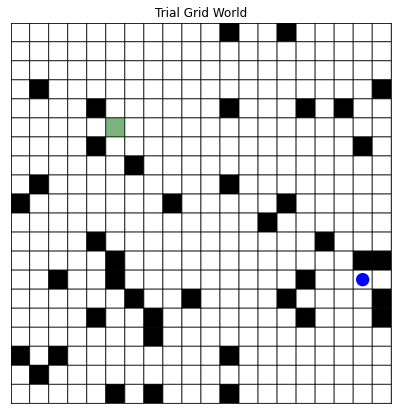

OH 1
PC 1


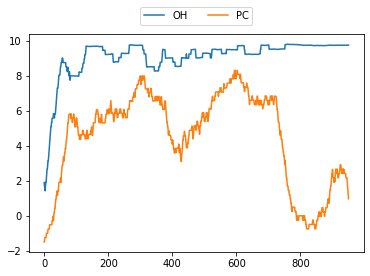

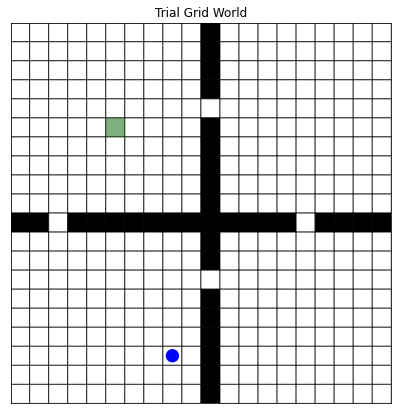

OH 1
PC 0


ValueError: need at least one array to concatenate

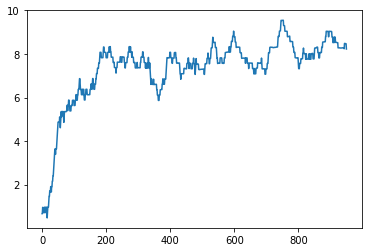

In [56]:
for ind, env_name in enumerate(list(master_dict.keys())):
    env = gym.make(env_name)
    plt.close()
    plt.figure()
    for key, v_list in master_dict[env_name].items():
        print(key, len(v_list))
        avg_, std_ = get_avg_std(v_list, cutoff=5000)
        label= key
        plt.plot(avg_, label=f'{label}')
        plt.fill_between(np.arange(len(avg_)),avg_-std_, avg_+std_, alpha=0.3)

    plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.15), ncol=4)
    plt.show()

In [34]:
with open('../Data/results/adf4a624-eb11-4dd8-8657-bddde96ef1da_data.p', 'rb') as f:
    data = pickle.load(f)

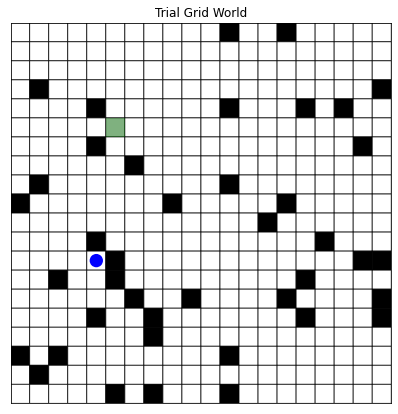

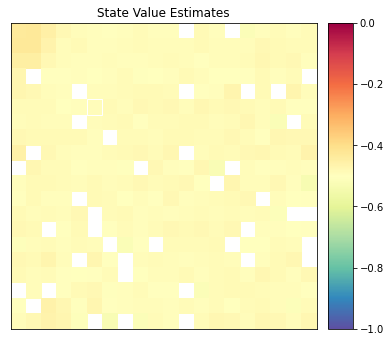

In [43]:
from Utils.gridworld_plotting import *
index =4555
env = gym.make('gym_grid:gridworld-v2')
plot_valmap(env, data['V_snap'][index], v_range=[-1,0])

In [37]:
print(master_dict.keys())

dict_keys(['gym_grid:gridworld-v1', 'gym_grid:gridworld-v2', 'gym_grid:gridworld-v3', 'gym_grid:gridworld-v4'])


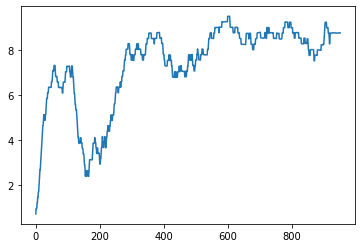

In [5]:
### TEMP Apr1 -- see single result
data_dir = '../Data/results/'
single_id = ['c4a5bb5b-8b64-480f-957f-80223d05cea6']

avg, std = get_avg_std(single_id)
plt.plot(avg)
plt.show()

In [6]:
from Utils.gridworld_plotting import *

In [7]:
with open(data_dir+ f'{single_id[0]}_data.p', 'rb') as f:
    data = pickle.load(f)

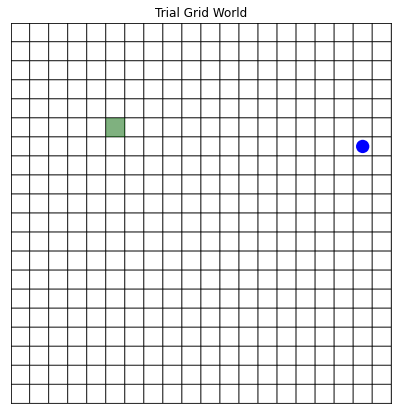

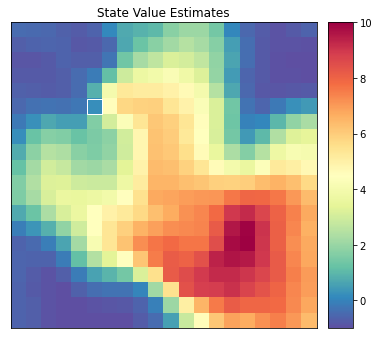

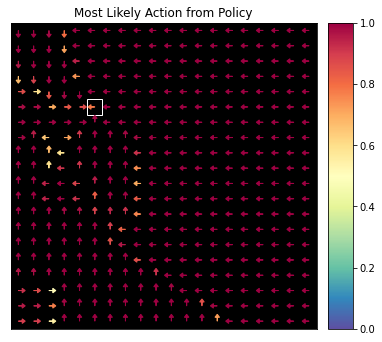

In [13]:
index = 999
env = gym.make('gridworld:gridworld-v1')
plot_valmap(env, data['V_snap'][index], v_range=[-1,10])
plot_polmap(env, data['P_snap'][index])